<a href="https://colab.research.google.com/github/Azevedo1996/recomendacoes_cancoes_com_base_em_letras/blob/main/recomendacao_musica_usando_semelhancas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer # Para vetorizar as letras das músicas
from sklearn.metrics.pairwise import cosine_similarity # Para calcular a similaridade de cosseno entre músicas

In [37]:
# Carregamento dos dados a partir do arquivo CSV
songs = pd.read_csv('/content/spotify_millsongdata.csv', encoding='utf-8')

In [38]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [39]:
# Pré-processamento dos dados
songs = songs.sample(n=20000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '', regex=True)

In [40]:
songs.head()

,artist,song,text
0,Paul McCartney,Hello Goodbye,"You say yes, I say no, you say stop, and I say..."
1,Chris Rea,Thinking Of You,(3. 30) \rSomewhere in this crazy night \rWi...
2,Enrique Iglesias,Ring My Bells,"Ring my bell, ring my bells \rRing my bell, r..."
3,Lea Salonga,Vision Of You,Time moves a summer wind \rI can see your fac...
4,Willie Nelson,Down To Our Last Goodbye,This was my last mistake \rThat's all her hea...


In [41]:
# Definição de uma música de entrada
text_input = """Wise men say
Only fools rush in
But I can't help falling in love with you
Shall I stay?
Would it be a sin
If I can't help falling in love with you?
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
For I can't help falling in love with you"""

In [43]:
# Criação de um novo DataFrame songs2 e adição da música de entrada
songs2: pd.DataFrame = songs.append(songs.iloc[0]) # Cria um novo DataFrame com base no DataFrame original 'songs'
songs2.loc[songs2.index[-1], 'text'] = text_input # Define as letras da última música no novo DataFrame como 'text_input'
songs2.loc[songs2.index[-1], 'song'] = "Input_Song" # Define o nome da última música como "Input_Song"
songs2 # Exibe o DataFrame songs2

<ipython-input-43-a0e6d0069c45>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  songs2: pd.DataFrame = songs.append(songs.iloc[0]) # Cria um novo DataFrame com base no DataFrame original 'songs'


,artist,song,text
0,Paul McCartney,Input_Song,Wise men say\nOnly fools rush in\nBut I can't ...
1,Chris Rea,Thinking Of You,(3. 30) \rSomewhere in this crazy night \rWi...
2,Enrique Iglesias,Ring My Bells,"Ring my bell, ring my bells \rRing my bell, r..."
3,Lea Salonga,Vision Of You,Time moves a summer wind \rI can see your fac...
4,Willie Nelson,Down To Our Last Goodbye,This was my last mistake \rThat's all her hea...
...,...,...,...
19996,Virgin Steele,"Mind,body,spirit","On the bridge of hades, searching for a sign ..."
19997,Radiohead,Pearly,How'd you get your teeth so pearly? \rDew-dro...
19998,Supertramp,Sting In The Tail,"Well, I don't care \rAbout the summer rain \..."
19999,Korn,Die Another Day,The madness creeping up on me \rThe pressure'...


In [44]:
# Criação de uma lista de documentos contendo as letras das músicas
documents = [f for f in songs['text']]
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(documents)
print(lyrics_matrix, lyrics_matrix.shape)

  (0, 23668)	0.0901784537770168
  (0, 19555)	0.06588294044419965
  (0, 47988)	0.029510544881546908
  (0, 25186)	0.020089704315016117
  (0, 19625)	0.01598694018497561
  (0, 23409)	0.07964818925710122
  (0, 12424)	0.08164706033145401
  (0, 19397)	0.8504660461387391
  (0, 17763)	0.286831134814756
  (0, 29867)	0.05016899738951984
  (0, 41017)	0.03183475936319214
  (0, 48339)	0.03246619811528024
  (0, 36982)	0.4035320651796306
  (1, 20784)	0.12921887152977155
  (1, 44122)	0.11531524639537466
  (1, 12181)	0.12921887152977155
  (1, 26194)	0.09830944335557289
  (1, 31616)	0.1088504288658919
  (1, 12897)	0.08404420433483467
  (1, 27061)	0.12921887152977155
  (1, 26408)	0.10141162126097782
  (1, 23081)	0.10371901451128998
  (1, 26062)	0.1204466607499766
  (1, 38762)	0.12921887152977155
  (1, 3495)	0.08062820289597358
  :	:
  (19999, 25533)	0.09226093422255835
  (19999, 48124)	0.08899620102315657
  (19999, 34526)	0.08605106391439424
  (19999, 9758)	0.34787788216022386
  (19999, 39317)	0.229555631

In [46]:
# Vetorização das letras usando TF-IDF
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity) # Cria um DataFrame com as similaridades
  df.columns = songs[0:10]['song'] # Define os nomes das músicas como colunas
  df.index = songs[0:10]['song'] # Define os nomes das músicas como índices
  fig, ax = plt.subplots(figsize=(5,5)) # Cria uma figura e eixo para o gráfico
  sns.heatmap(df, cmap=cmap) # Plota o mapa de calor das similaridades

In [47]:
# Cálculo da similaridade de cosseno entre as músicas
cosine_similarities = cosine_similarity(lyrics_matrix)

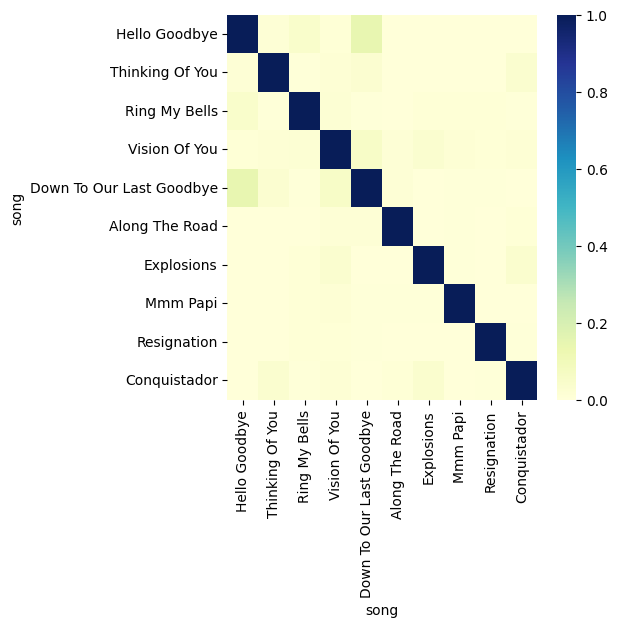

In [48]:
create_heatmap(similarity= cosine_similarities[0:10, 0:10]) # Plota o mapa de calor com as 10 músicas mais similares

In [50]:
# Inicialização de um dicionário para armazenar as similaridades
similarities = {}
# Cálculo das músicas mais similares e armazenamento no dicionário
for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] # Índices das músicas mais similares
    similarities[songs2['song'].iloc[i]] = [(cosine_similarities[i][x], songs2['song'][x], songs2['artist'][x]) for x in similar_indices][1:]

In [51]:
# Definição de uma classe Recommender para gerar recomendações
class Recommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)

        print(f'The {rec_items} recommended songs are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]}")
            print("--------------------")

    def recommend(self, recommendation):
        song = recommendation['song']
        number_songs = recommendation['number_songs']
        recom_song = self.matrix_similar[song][:number_songs]
        self._print_message(song=song, recom_song=recom_song)

In [52]:
# Criação de uma instância da classe Recommender e geração de recomendações
recommedations = Recommender(similarities)

In [53]:
recommendation2 = {
    "song": songs['song'].iloc[-1], # Escolhe a última música do DataFrame 'songs' como música de entrada
    "number_songs": 5 # Define o número de recomendações desejado
}
recommedations.recommend(recommendation2) # Gera as recomendações com base na música de entrada

The 5 recommended songs are:
Number 1:
Die Die My Darling by Misfits
--------------------
Number 2:
I Die: You Die by Gary Numan
--------------------
Number 3:
One Down Two To Go by King Diamond
--------------------
Number 4:
Wild Child by Enya
--------------------
Number 5:
Let It Die by Foo Fighters
--------------------
